In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
name = "CIPLA.NS"
link = f"https://query1.finance.yahoo.com/v7/finance/download/{name}?period1=1604534400&period2=1636070400&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(link)

In [3]:
main = df[["Close", "Date"]]
y = main["Close"]
y.fillna(method='ffill', inplace=True)
x = main["Date"]
main.insert(0, "Days", range(len(df)))

/opt/homebrew/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [4]:
dimension = np.polyfit(main["Days"], y, 1)
frame = np.poly1d(dimension)

In [5]:
main.insert(0,'Line of Best-Fit',frame(main['Days']))


<AxesSubplot:title={'center':'CIPLA.NS'}, xlabel='Days'>

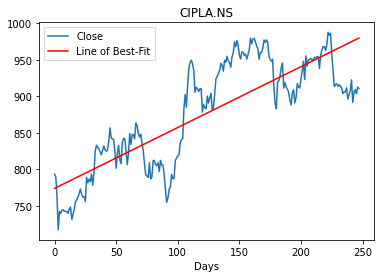

In [6]:
ax = main.plot(x="Days", y="Close")
main.plot(x="Days", title=name, y="Line of Best-Fit", ax=ax, color="red")